In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [10]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit

In [11]:
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw('text')

┌─────────────────┐
q_0: ┤ initialize(0,1) ├
     └─────────────────┘

In [12]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit

In [13]:
result = execute(qc, backend).result()

In [14]:
out_state = result.get_statevector()
print(out_state) # Display the output state vector

[0.+0.j 1.+0.j]


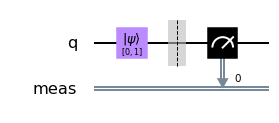

In [15]:
qc.measure_all()
qc.draw("mpl")

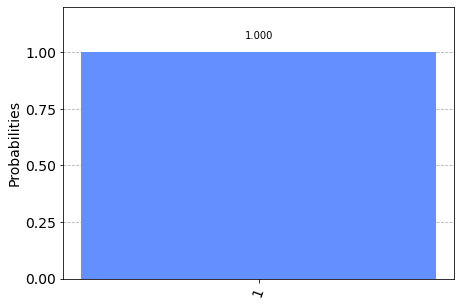

In [16]:
counts = result.get_counts()
plot_histogram(counts)

In [17]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q>

In [18]:
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialise the 0th qubit in the state `initial_state`
state = execute(qc,backend).result().get_statevector() # Execute the circuit
print(state)           # Print the result

[0.70710678+0.j         0.        +0.70710678j]


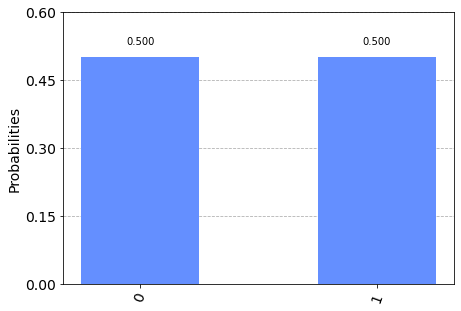

In [20]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

In [21]:
vector = [1,1]
qc.initialize(vector, 0)

QiskitError: 'Sum of amplitudes-squared does not equal one.'

In [23]:
qc = QuantumCircuit(1) # Redefine qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.draw('text')

┌──────────────────────────────┐
q_0: ┤ initialize(0.70711j,0.70711) ├
     └──────────────────────────────┘

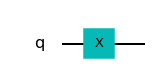

In [24]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

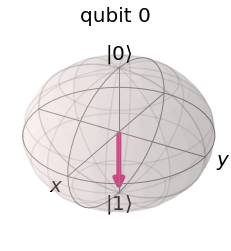

In [25]:
from qiskit.visualization import plot_bloch_multivector
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

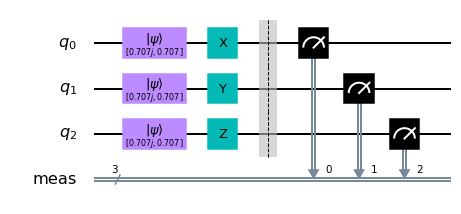

In [32]:
qc = QuantumCircuit(3)
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.initialize(initial_state, 1)
qc.initialize(initial_state, 2)
qc.x(0)
qc.y(1)
qc.z(2)
qc.measure_all()
qc.draw("mpl")


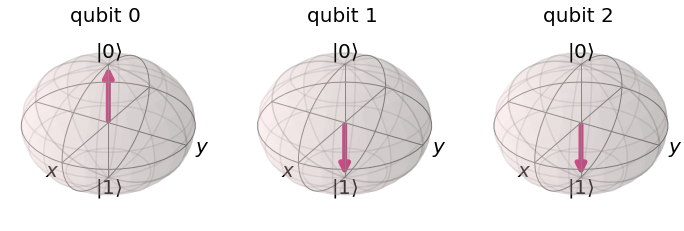

In [33]:
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

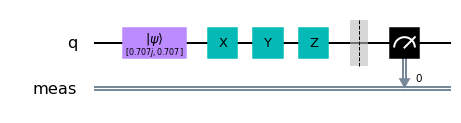

In [37]:
qc = QuantumCircuit(1)
qc.initialize(initial_state, 0)
qc.x(0)
qc.y(0)
qc.z(0)
qc.measure_all()
qc.draw("mpl")


[0.+0.j 0.-1.j]


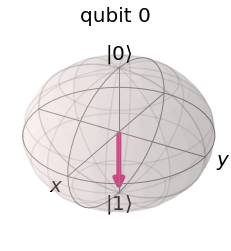

In [39]:
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
print(out)
plot_bloch_multivector(out)

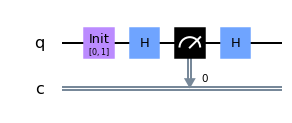

In [46]:
from qiskit.extensions import Initialize # Import the Inititialize function
# Create the X-measurement function:
def x_measurement(qc,qubit,cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    return qc

# Initialise our qubit and measure it
qc = QuantumCircuit(1,1)
initial_state = [0,1]
initializer = Initialize(initial_state)
initializer.label = "init"
qc.append(initializer, [0])
x_measurement(qc, 0, 0)
qc.draw("mpl")

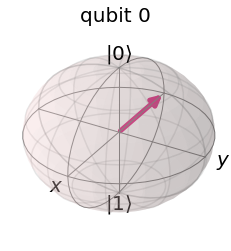

In [44]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
out_state = execute(qc,backend).result().get_statevector() # Do the simulation, returning the state vector
plot_bloch_multivector(out_state) # Display the output state vector

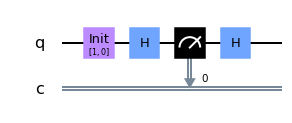

In [47]:
qc = QuantumCircuit(1,1)
initial_state = [1,0]
initializer = Initialize(initial_state)
initializer.label = "init"
qc.append(initializer, [0])
x_measurement(qc, 0, 0)
qc.draw("mpl")

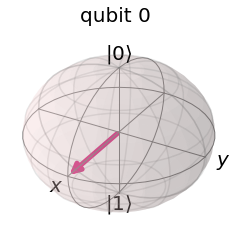

In [48]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
out_state = execute(qc,backend).result().get_statevector() # Do the simulation, returning the state vector
plot_bloch_multivector(out_state) # Display the output state vector

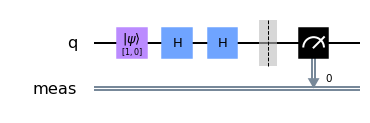

In [57]:
qc = QuantumCircuit(1)
initial_state = [1,0]
qc.initialize(initial_state, 0)
qc.h(0)
qc.h(0)
qc.measure_all()
qc.draw("mpl")

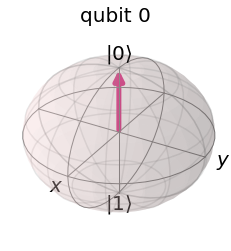

In [58]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
out_state = execute(qc,backend).result().get_statevector() # Do the simulation, returning the state vector
plot_bloch_multivector(out_state) # Display the output state vector